# Overhang control in topology optimization: a comparison of continuous front propagation-based and discrete layer-by-layer overhang control

By Emiel van de Ven

This notebook is supplementary material to the publication "Overhang control in topology optimization: a comparison of  continuous front propagation-based and discrete layer-by-layer overhang control", and aims to demonstrate several implementations of overhang filers for topology optimization.

# Interactive topology optimization applet

Running the cell below (Ctrl+enter) generates an interactive topology optimization. The following python packages are required: `scipy`, `numpy`, `matplotlib`, `threading`, and `ipywidgets`.

The topolgoy optimization is based on the python implementation of the [88-line topolgoy optimization code by Niels Aage and Villads Egede Johansen](http://www.topopt.mek.dtu.dk/Apps-and-software/Topology-optimization-codes-written-in-Python), with some minor modifications to incorperate the overhang filters. The layer-by-layer filter that is implemented is a python adaption of the supplementary material of ["An additive manufacturing filter for topology optimization of print-ready designs", M. Langelaar (2016)](https://link.springer.com/article/10.1007/s00158-016-1522-2). The front-propagation based overhang filter is based on ["Continuous front propagation-based overhang control for topology optimization with additive manufacturing", E van de Ven et al.](https://link.springer.com/article/10.1007/s00158-017-1880-4), while the improved version is described in the current publication.

The controls are self-explanatory, and the reader is encouraged to play with different values to see the effect (in real-time for some controls). Some guidelines:
* The AM Filter is quite non-linear filter, and requires small movelimits for some elements. When the design seems to oscillate between two designs, it can help to decrease the movelimit. This is especially the case for the old front-propagation filter, as it has the highest non-linearity.
* The old front-propagation implementation works best with continuation. This will linearly interpolate between the overhang filtered and the original design: `x_final = cont*xPhys + (1-cont)*xPrint`, where `cont` starts at `0`, and increases with `0.1` over the first 10 iterations. Without continuation, the design has to 'grow' from the bottom, try it!
* `k`: this parameter controls the sharpness of transitions from black to white for front-propagation based filters. It is normally related to element size, but you can play with it.
* `v_void`: for the old overhang filter, this controls the propagation speed through void regions. For high values, `k` should be increased as well to obtain crisp black-white designs.

<IPython.core.display.Javascript object>


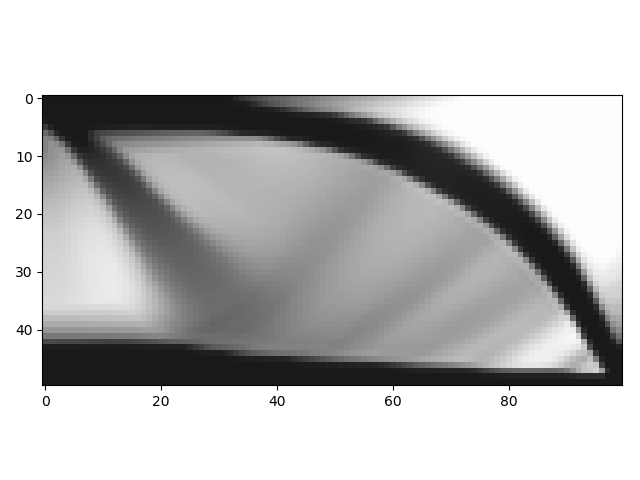

In [1]:
%matplotlib notebook
import setupGUI